<div style="text-align: center;">
    <h1>Applied Data Science</h1>
    <h3><em>Spring 2025</em></h3>
    <h2>Assignment 8 - Multiclass Classification Methods</h2>
    <hr style="width:60%;">
    <h3>AmirReza Azari</h3>
    <p><em>Student ID: 99101087</em></p>
</div>

---

---
## Installing and Importing Libraries

In [1]:
import pandas as pd
import io
import os
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

We uninstall any existing version and install the latest `scikit-learn` to ensure compatibility and access to the newest features.


In [2]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
import sklearn
print(sklearn.__version__)

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 35.8 MB/s eta 0:00:00
1.6.1


## Loading the Dataset

In [3]:
# Uploading a dataset from the local machine into Google Colab
# This allows me to bring in the file I want to work with (e.g., a CSV file containing car data)

from google.colab import files
uploaded = files.upload()

# What I understood:
# This code opens a file picker so I can upload a file. Once uploaded, I can read it into a pandas DataFrame.

Saving features_3_sec.csv to features_3_sec.csv


We load the CSV file `features_3_sec.csv` from the uploaded files using `pandas` and print its shape to check the number of rows and columns.


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['features_3_sec.csv']))
print(df.shape)

(9990, 60)


We display the first 10 rows of the DataFrame to get an overview of the data and understand its structure and contents.


In [5]:
df.head(10)

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
5  blues.00000.5.wav   66149          0.376670         0.089702  0.132618   
6  blues.00000.6.wav   66149          0.379909         0.088827  0.130335   
7  blues.00000.7.wav   66149          0.331880         0.092119  0.140600   
8  blues.00000.8.wav   66149          0.347877         0.094209  0.133130   
9  blues.00000.9.wav   66149          0.358061         0.082957  0.115312   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   
5  0.003583             1994.915219          211700.619569   
6  0.003166             1962.150096          177443.070045   
7  0.002546             1701.890924           35678.130616   
8  0.002538             1746.473502          138073.931244   
9  0.001846             1763.948942           61493.423121   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   
5              2152.767854            74263.873102  ...   31.448069   
6              2146.503479            98020.541422  ...   33.954071   
7              1979.387612            36670.725886  ...   38.456211   
8              1887.619723           117069.920049  ...   44.311455   
9              1874.195710            51944.921435  ...   43.967834   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   
5    -3.448373   34.284130    -0.416165   40.791092    -3.649625   32.457901   
6    -2.068194   25.623655     1.428141   47.957699    -3.267124   39.382240   
7    -3.637886   24.530296    -0.105148   26.716150    -2.016985   23.150423   
8    -4.370029   29.873167     2.114592   33.843155    -2.264663   80.812393   
9    -3.448304   48.671944     0.099792   41.839546    -7.677177   96.253654   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  
5     3.025218   28.892687  blues  
6     3.276939   25.999132  blues  
7     0.210787   42.512966  blues  
8     3.758598   97.618835  blues  
9     0.791776   40.416420  blues  

[10 rows x 60 columns]

We use `df.info()` to check the dataset's column names, data types, and non-null counts to understand the structure and detect any missing values.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

We display the last 10 rows of the DataFrame to observe how the dataset ends and check for consistency or unusual patterns at the bottom.


In [7]:
df.tail(10)

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
9980  rock.00099.0.wav   66149          0.359345         0.087013  0.042111   
9981  rock.00099.1.wav   66149          0.354555         0.088747  0.046246   
9982  rock.00099.2.wav   66149          0.357302         0.087049  0.068219   
9983  rock.00099.3.wav   66149          0.363849         0.083415  0.061953   
9984  rock.00099.4.wav   66149          0.331063         0.086797  0.049002   
9985  rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986  rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987  rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988  rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989  rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
9980  0.000099             1273.740163           8.377967e+04   
9981  0.000024             1285.381169           1.404746e+05   
9982  0.001088             1767.109694           1.039182e+06   
9983  0.000108             1883.556536           4.458933e+05   
9984  0.000085             1453.105181           9.092599e+04   
9985  0.000097             1499.083005           1.642669e+05   
9986  0.000088             1847.965128           2.810549e+05   
9987  0.000701             1346.157659           6.629562e+05   
9988  0.000320             2084.515327           2.038910e+05   
9989  0.000067             1634.330126           4.114292e+05   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
9980              1572.311240            56483.195555  ...   42.113430   
9981              1610.539647            84477.349518  ...   73.661415   
9982              1781.612572           218272.923343  ...  137.820633   
9983              2067.611047            59661.311284  ...   30.492552   
9984              1853.225289            34680.734836  ...   41.439960   
9985              1718.707215            85931.574523  ...   42.485981   
9986              1906.468492            99727.037054  ...   32.415203   
9987              1561.859087           138762.841945  ...   78.228149   
9988              2018.366254            22860.992562  ...   28.323744   
9989              1867.422378           119722.211518  ...   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
9980    -5.125557  106.044090    -4.949506   75.995911    -1.051005   
9981    -1.228446  123.630943     1.537981   81.046585     2.204211   
9982    -3.902851   20.882080     5.083835   22.987999     1.422620   
9983    -5.977820   24.041330     7.069550   31.257437    -1.294685   
9984   -18.169489   48.133842    -7.716023   68.707573    -5.025846   
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
9980   64.142525     1.759373  104.436234   rock  
9981  117.848541    12.098663   24.880024   rock  
9982   43.682262    -0.320281   22.994532   rock  
9983   40.059143     2.543117   16.656778   rock  
9984   49.742214     0.084607   40.060772   rock  
9985   48.804092     1.818823   38.966969   rock  
9986   63.452255     0.428857   18.697033   rock  
9987   48.582378    -0.299545   41.586990   rock  
9988   24.843613     0.675824   12.787750   rock  
9989   39.485901    -3.412534   31.727489   rock  

[10 rows x 60 columns]

We use `df.describe()` to view summary statistics (mean, std, min, max, etc.) for each numerical column to understand data distribution and spot outliers.


In [8]:
df.describe()

length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   9990.0       9990.000000      9990.000000  9990.000000  9.990000e+03   
mean   66149.0          0.379534         0.084876     0.130859  2.676388e-03   
std        0.0          0.090466         0.009637     0.068545  3.585628e-03   
min    66149.0          0.107108         0.015345     0.000953  4.379535e-08   
25%    66149.0          0.315698         0.079833     0.083782  6.145900e-04   
50%    66149.0          0.384741         0.085108     0.121253  1.491318e-03   
75%    66149.0          0.442443         0.091092     0.176328  3.130862e-03   
max    66149.0          0.749481         0.120964     0.442567  3.261522e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9990.000000           9.990000e+03              9990.000000   
mean              2199.219431           4.166727e+05              2241.385959   
std                751.860611           4.349644e+05               543.854449   
min                472.741636           8.118813e+02               499.162910   
25%               1630.680158           1.231961e+05              1887.455790   
50%               2208.628236           2.650692e+05              2230.575595   
75%               2712.581884           5.624152e+05              2588.340505   
max               5432.534406           4.794119e+06              3708.147554   

       spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean   mfcc16_var  \
count            9.990000e+03   9990.000000  ...  9990.000000  9990.000000   
mean             1.182711e+05   4566.076592  ...     1.448240    49.988755   
std              1.013505e+05   1642.065335  ...     5.735149    34.442816   
min              1.183520e+03    658.336276  ...   -26.850016     1.325786   
25%              4.876553e+04   3378.311110  ...    -2.227478    29.584894   
50%              8.996072e+04   4631.377892  ...     1.461623    41.702393   
75%              1.585674e+05   5591.634521  ...     5.149752    59.274619   
max              1.235143e+06   9487.446477  ...    39.144405   683.932556   

       mfcc17_mean   mfcc17_var  mfcc18_mean   mfcc18_var  mfcc19_mean  \
count  9990.000000  9990.000000  9990.000000  9990.000000  9990.000000   
mean     -4.198706    51.962753     0.739943    52.488851    -2.497306   
std       5.677379    36.400669     5.181313    38.177120     5.111799   
min     -27.809795     1.624544   -20.733809     3.437439   -27.448456   
25%      -7.951722    29.863448    -2.516638    29.636197    -5.734123   
50%      -4.443021    42.393583     0.733772    41.831377    -2.702366   
75%      -0.726945    61.676964     3.888734    62.033906     0.514246   
max      34.048843   529.363342    36.970322   629.729797    31.365425   

        mfcc19_var  mfcc20_mean   mfcc20_var  
count  9990.000000  9990.000000  9990.000000  
mean     54.973829    -0.917584    57.322614  
std      41.585677     5.253243    46.444212  
min       3.065302   -35.640659     0.282131  
25%      30.496412    -4.004475    30.011365  
50%      43.435253    -1.030939    44.332155  
75%      65.328602     2.216603    68.210421  
max    1143.230591    34.212101   910.473206  

[8 rows x 58 columns]

We use `df.columns` to list all column names in the DataFrame, helping us identify available features and target variables.


In [9]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

## Getting Some Insights from Our Data
It is now time to do some EDA

We create a copy of the original DataFrame as `main_df` and exclude the columns `'filename'`, `'label'`, and `'length'` from `df` for further analysis.


In [10]:
main_df = df
# Exclude the specified columns 'filename', 'label', and 'length'
df = df[df.columns.difference(['filename', 'label', 'length'])]

We plot histograms for five specified features (`'chroma_stft_mean'`, `'mfcc1_mean'`, `'tempo'`, `'spectral_centroid_mean'`, and `'rms_mean'`) to visualize their distributions, using a 2x3 grid layout for the subplots.


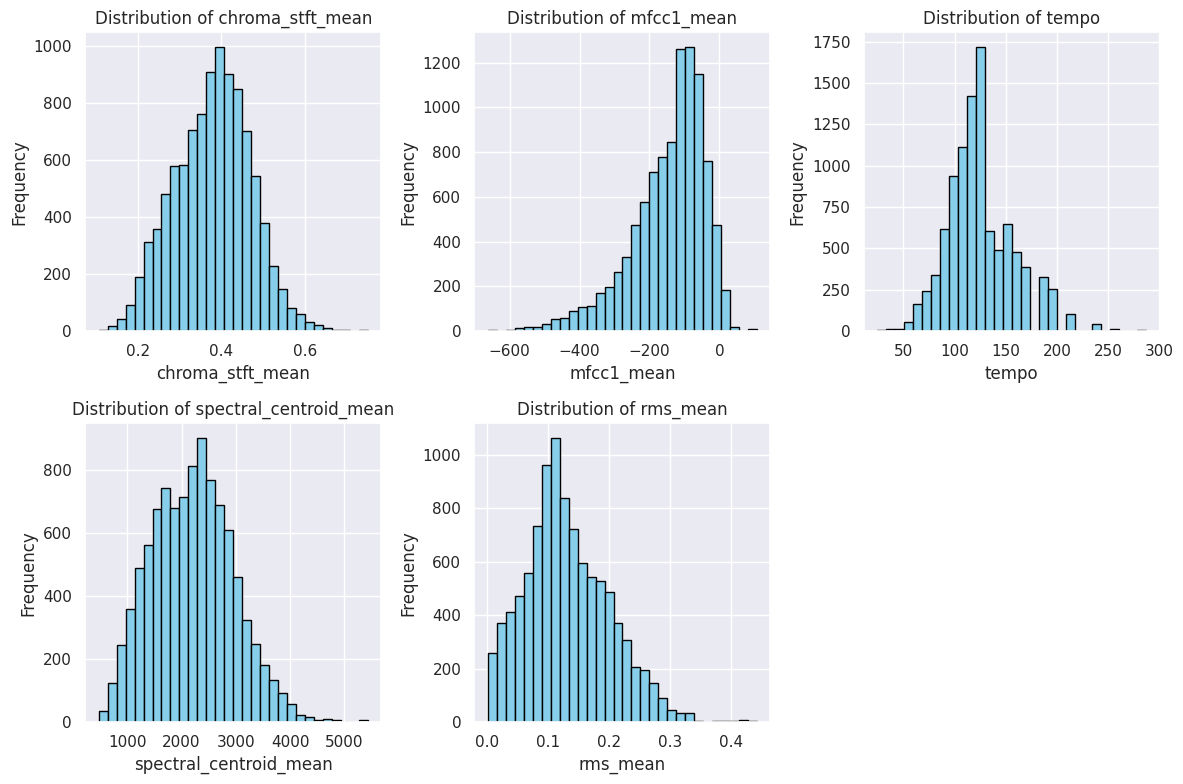

In [11]:
import matplotlib.pyplot as plt

# List of features to plot histograms for
features_to_plot = ['chroma_stft_mean', 'mfcc1_mean', 'tempo', 'spectral_centroid_mean', 'rms_mean']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)  # 2x3 grid for 5 features
    plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


We compute the correlation matrix for the features in `df` and visualize it as a heatmap to understand the relationships between different features.


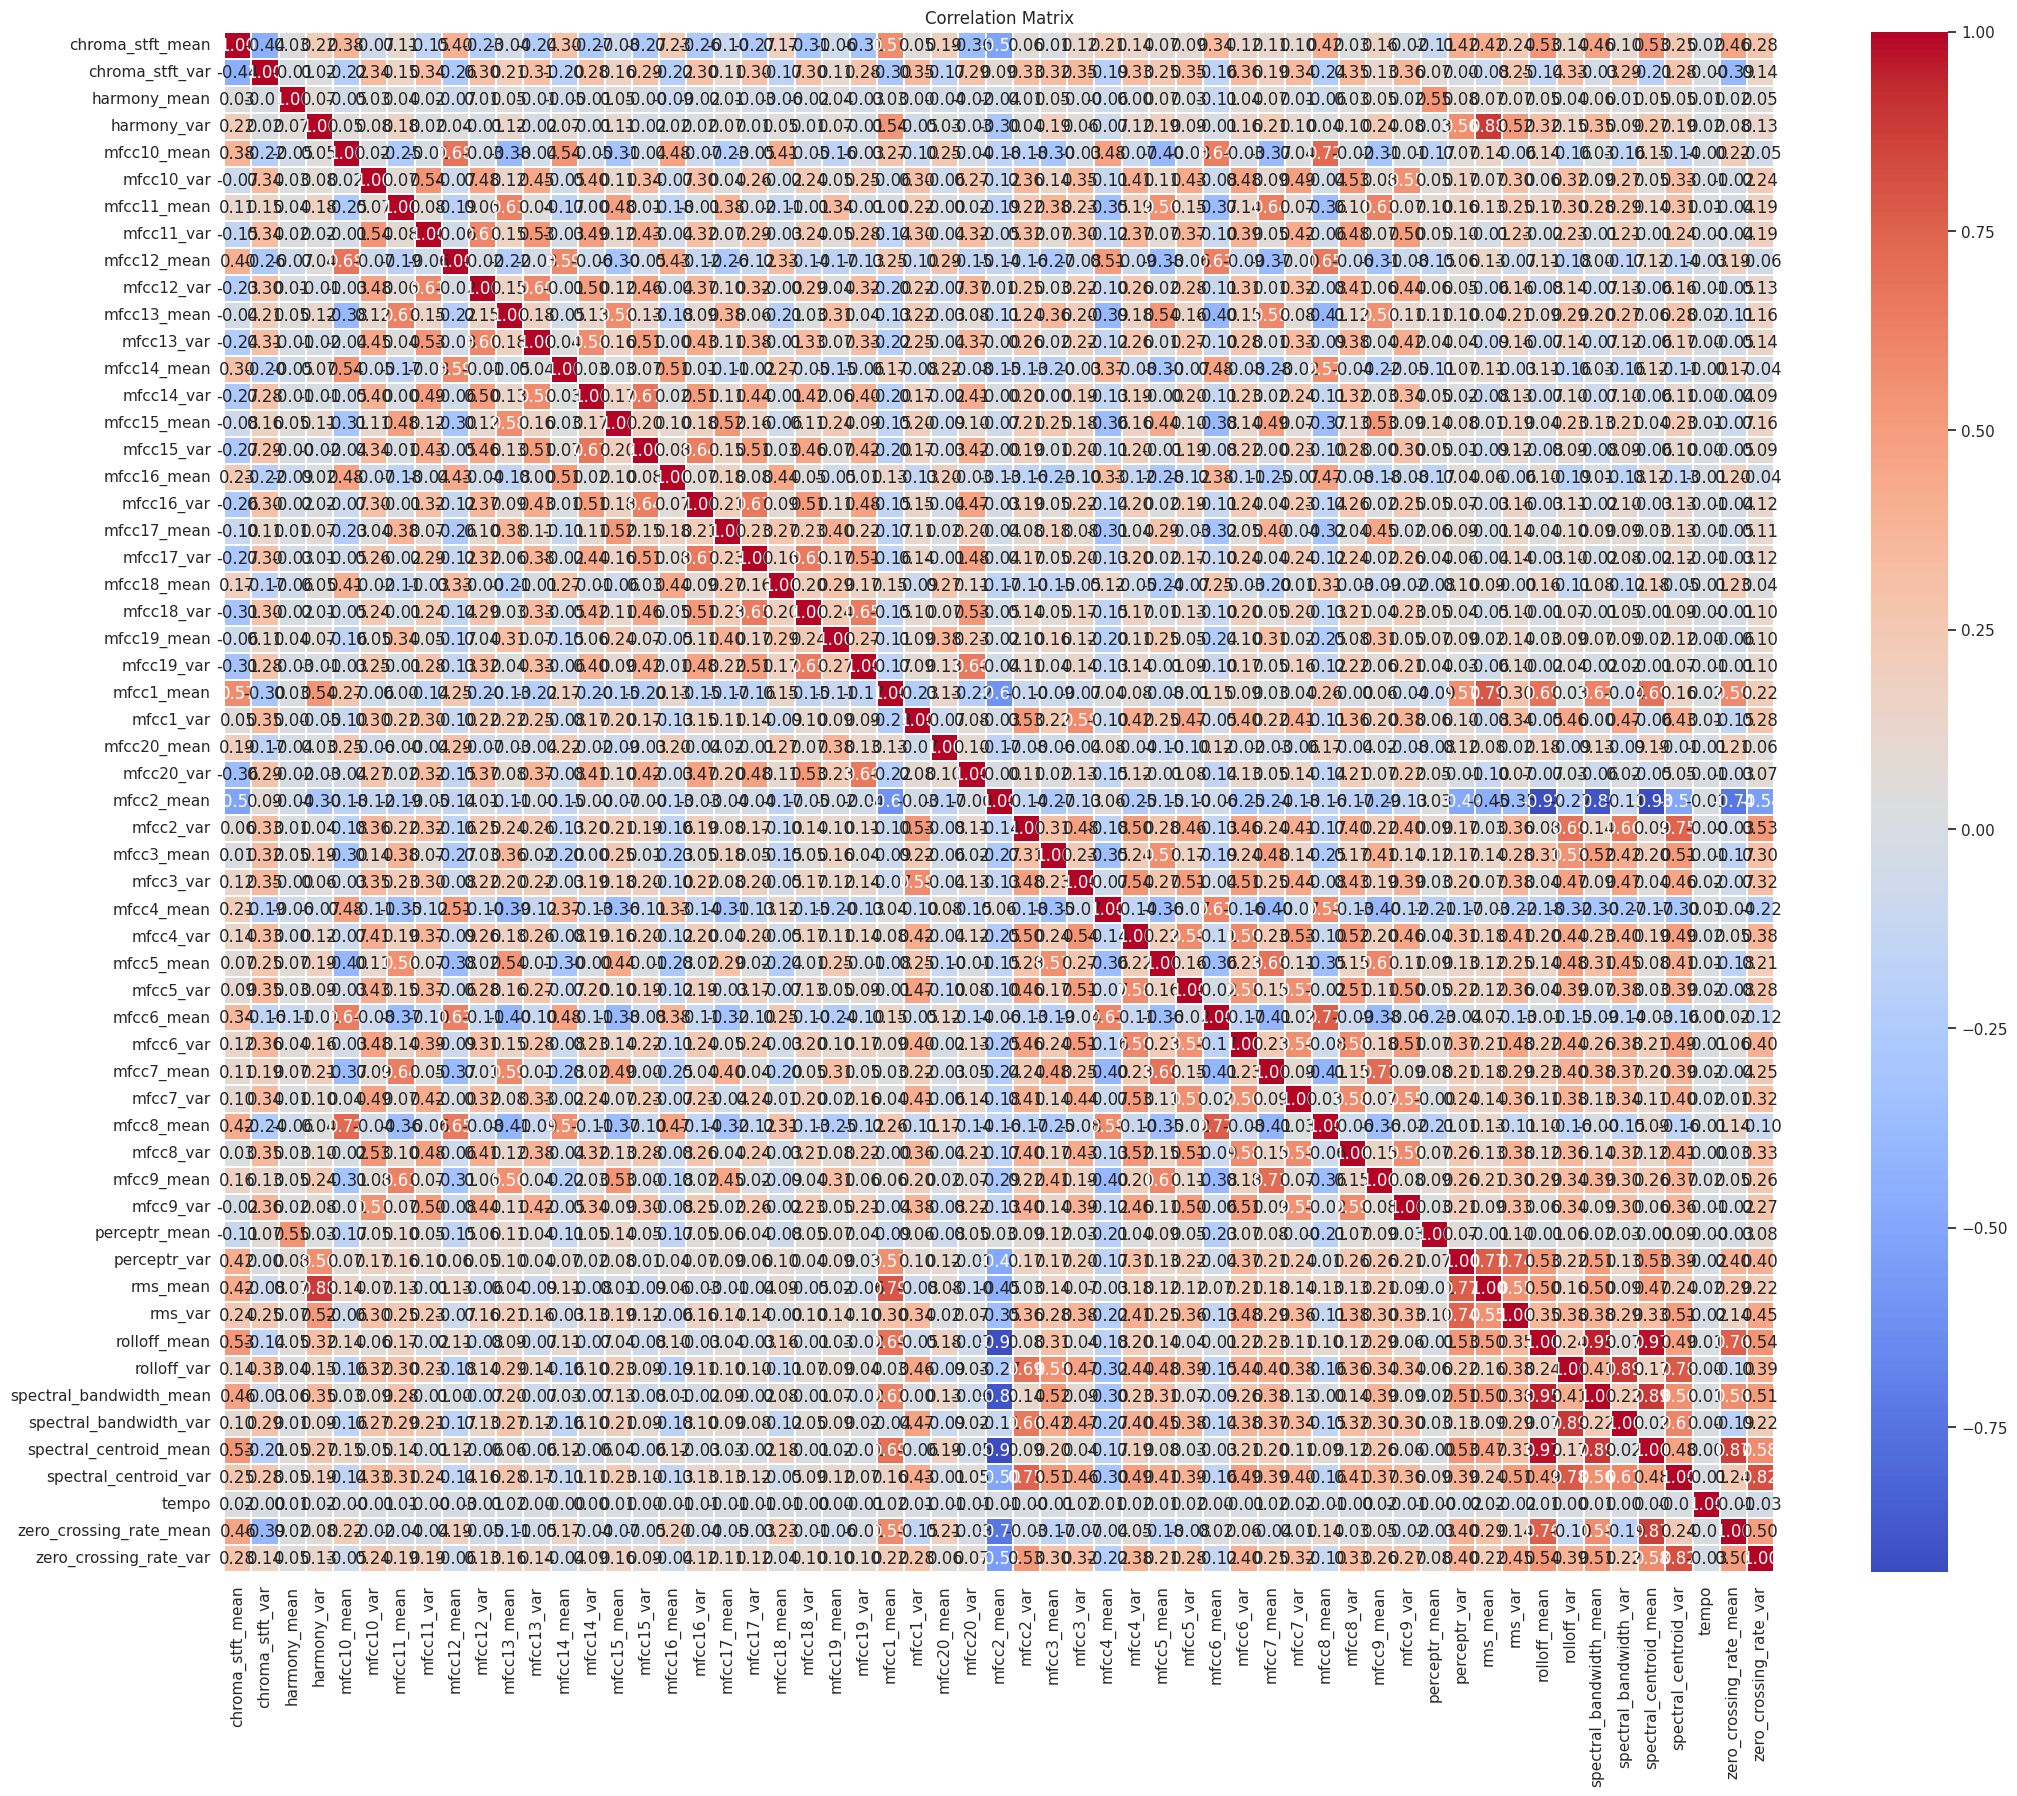

In [12]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.15)
plt.title('Correlation Matrix')
plt.show()

We compute the correlation matrix and create a masked heatmap to display only the lower triangle of correlations for better readability, with enhanced annotations and label rotations.


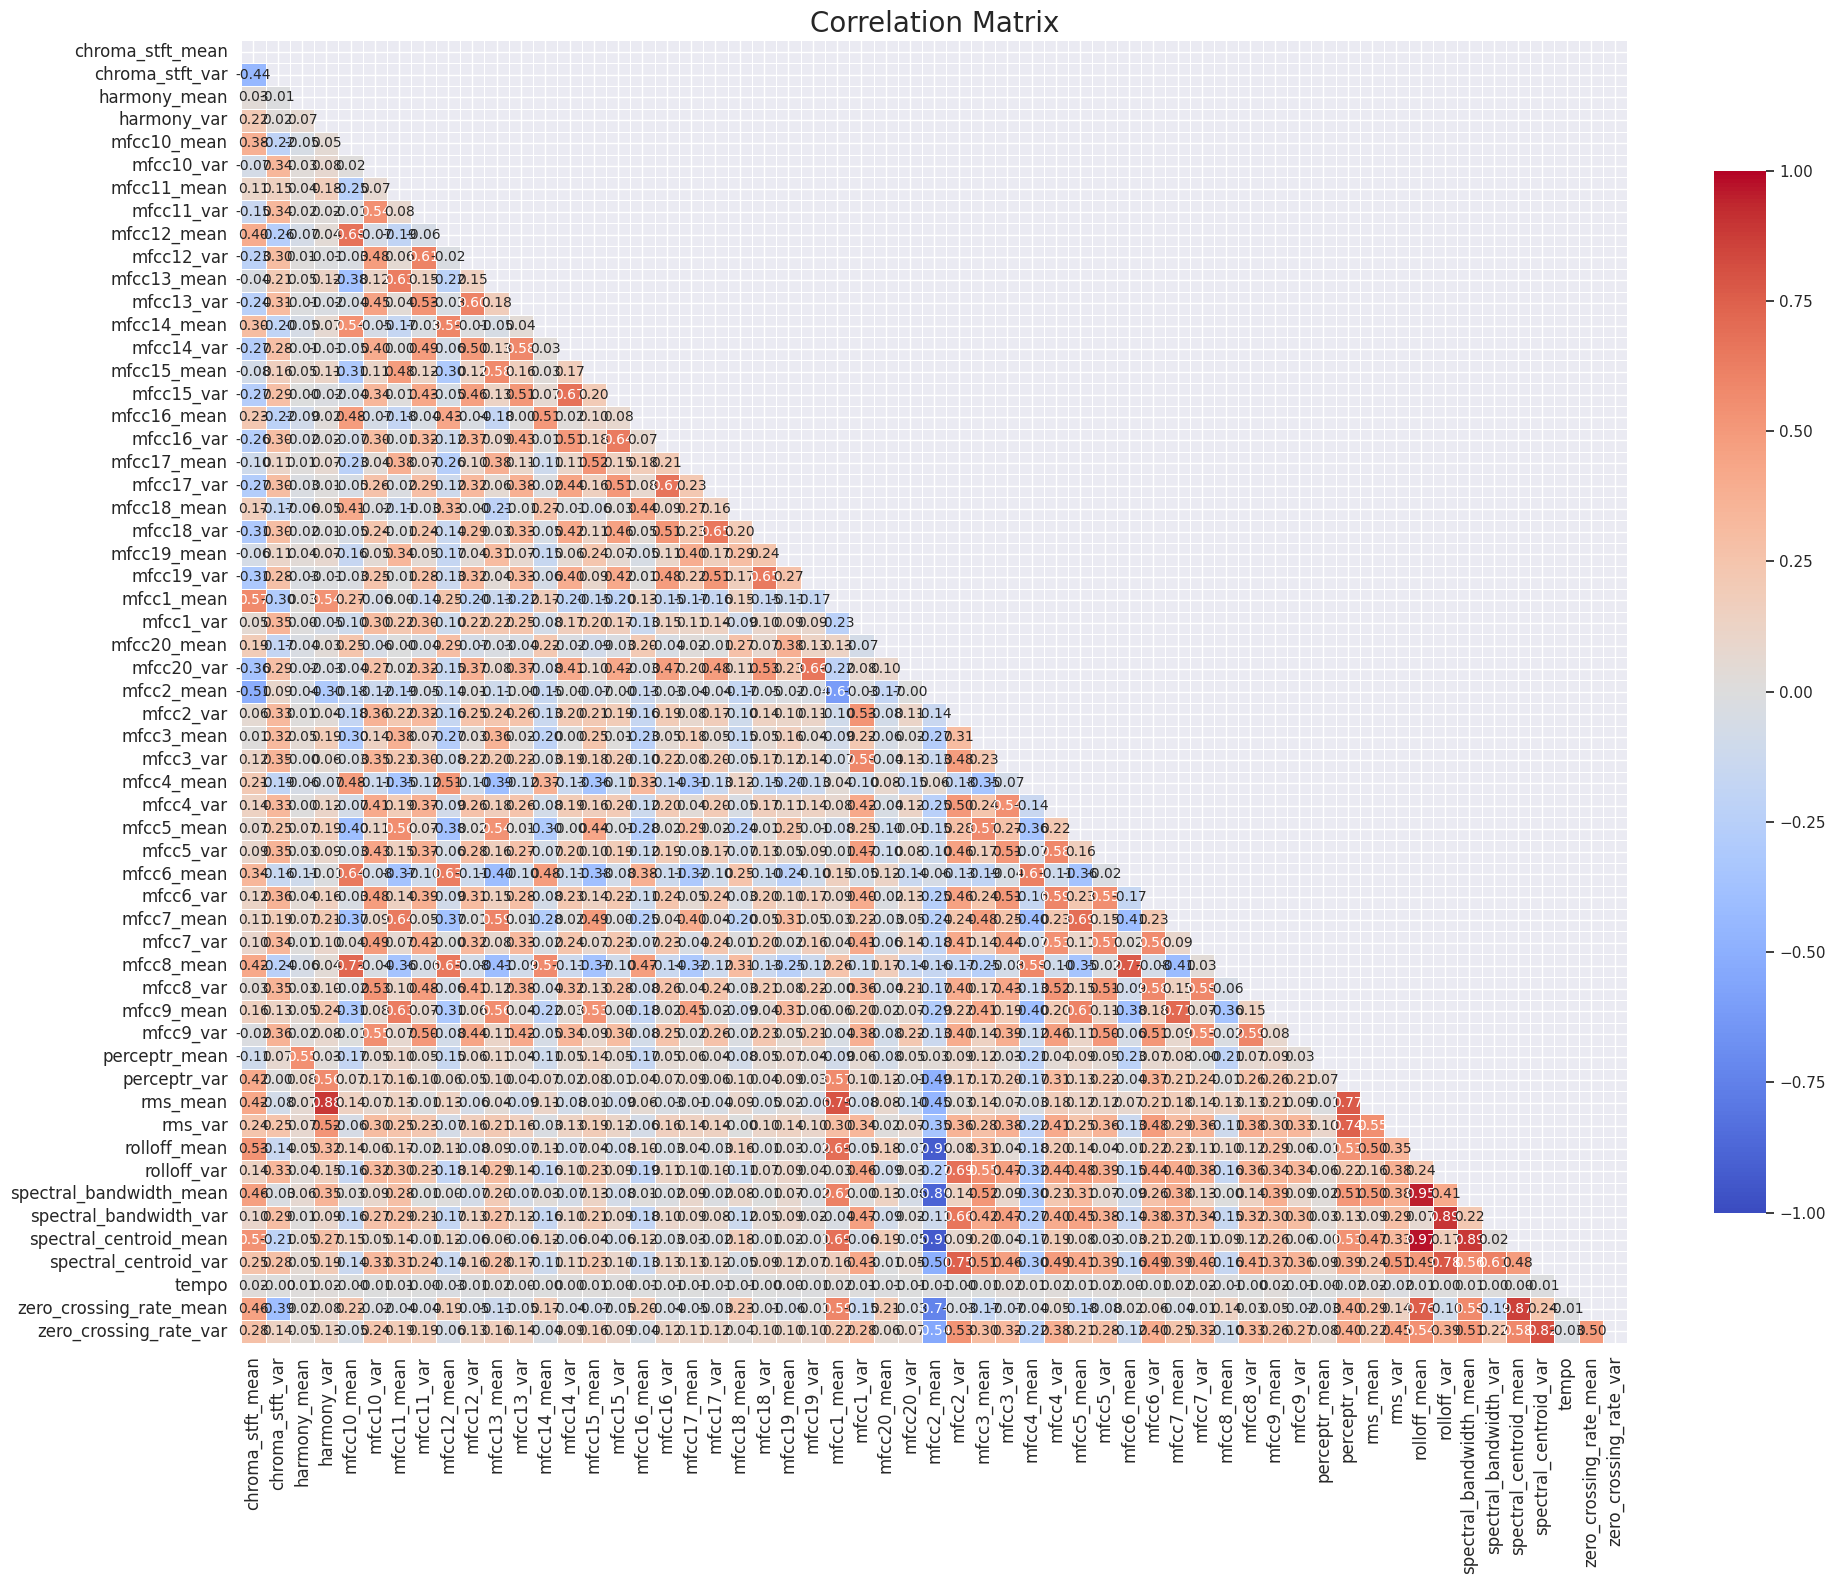

In [13]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a larger plot and make sure annotations are readable
plt.figure(figsize=(20, 16))

# Create the heatmap with the mask applied and larger annotations
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, mask=mask,
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 10}, vmin=-1, vmax=1)

# Rotate labels for readability
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title('Correlation Matrix', fontsize=20)
plt.tight_layout()
plt.show()

We plot the class distribution of the `'label'` column using a bar chart to visualize the frequency of each class in the dataset.


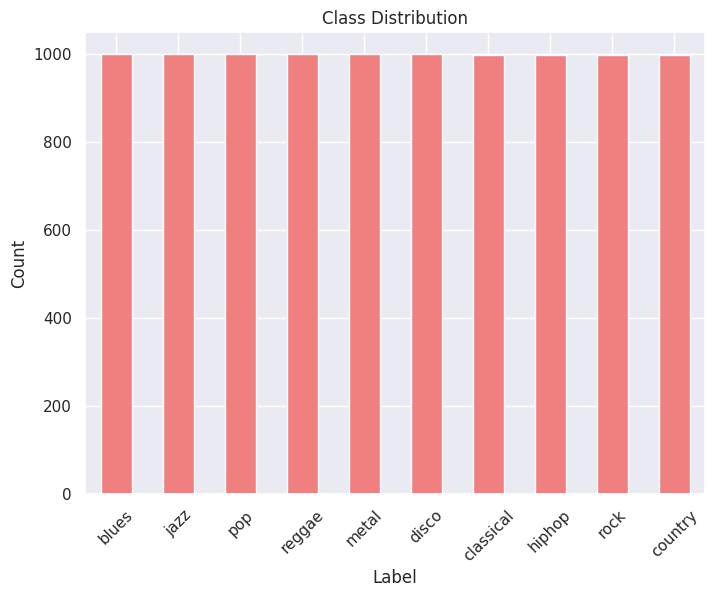

In [14]:
# Plot class distribution in 'label' column
plt.figure(figsize=(8, 6))
main_df['label'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We apply PCA to reduce the dimensionality of the numerical features to 2 components, then plot the 2D visualization of the transformed data, color-coded by the class labels.


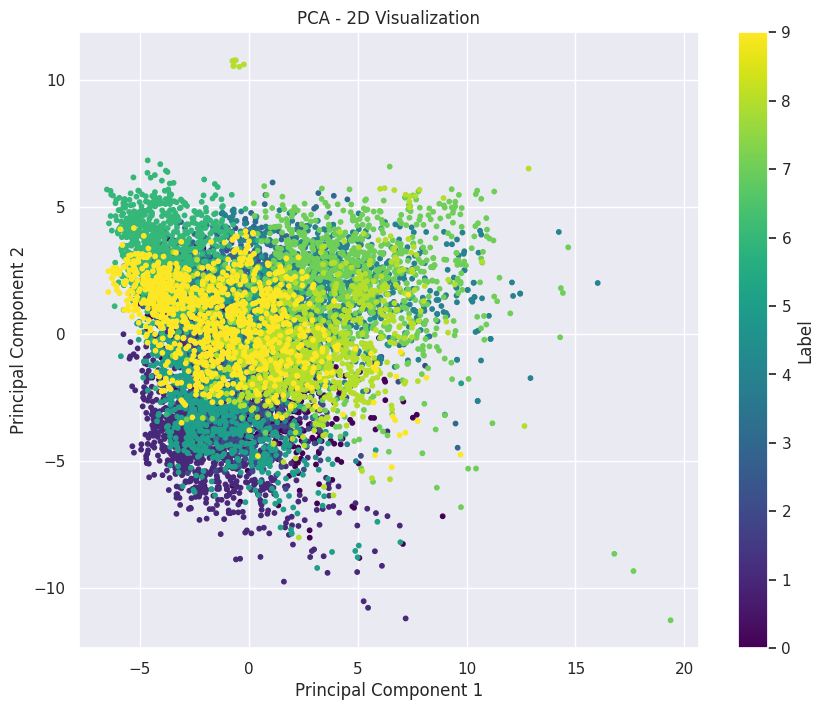

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA
numerical_features = main_df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Perform PCA (reduce to 2 components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot PCA result
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=main_df['label'].astype('category').cat.codes, cmap='viridis', s=10)
plt.colorbar(label='Label')
plt.title('PCA - 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


We visualize the class distribution in the `'label'` column as a pie chart, displaying the percentage of each class in the dataset.


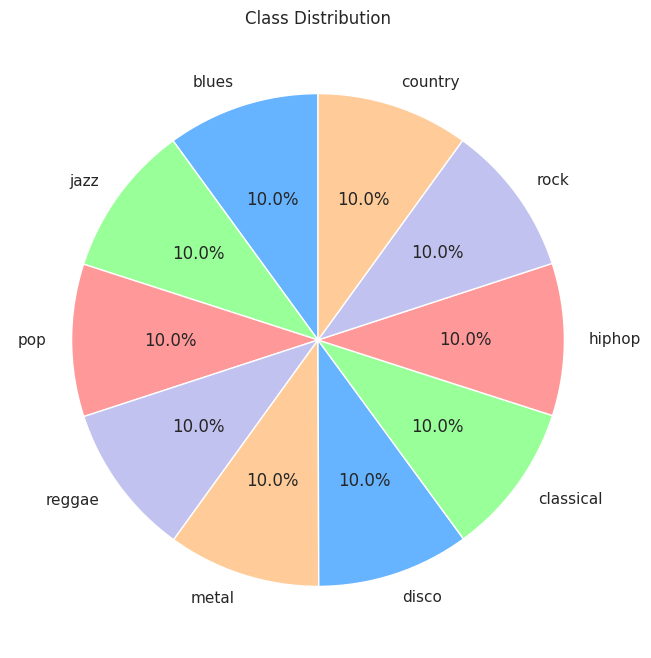

In [16]:
# Plot class distribution as a Pie Chart
plt.figure(figsize=(8, 8))

# Create the pie plot
main_df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ff9999', '#c2c2f0', '#ffcc99'])

# Set title and clean up the plot
plt.title('Class Distribution')
plt.ylabel('')  # Hide the y-label for better presentation
plt.show()


# Data Cleaning
From the above overview, we saw some rows with null values. To save time, we simply drop them here.

We iterate over all columns in `main_df` to check for any null values and print the number of missing values in each column that contains null values.


In [17]:
for col_name in list(main_df.columns):
  no_null_values = sum(main_df[col_name].isnull())
  if no_null_values:
    print('Number of null values in column %s is %d' %(col_name,no_null_values))

As you can see we do noy have any null data. We can understand it from df.info too.

## Feature Engineering
Based on the type of the dataset and different metrics, maybe it is not necessary to feature engineering. So we continue to more important parts.

## Normalization/Stadardization and Pareparing Train and Test Sets

In [18]:
# Extract relevant features and target variable
# - We remove non-feature columns (such as 'filename', 'label', 'length') and select the remaining columns as the features
X1 = main_df.loc[:, ~main_df.columns.isin(['filename', 'label', 'length'])]  # Remove non-feature columns

# - The 'label' column is selected as the target variable
y1 = main_df['label']  # Target variable

# Normalize features
# - Standardize the feature data (X1) to have mean=0 and variance=1 for better model convergence
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

# Encode labels
# - Convert the categorical target labels into numerical labels using LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y1)

# Split the data into training and testing sets (80-20 split)
# - The training data will be 80% and the testing data will be 20% of the original data
# - We shuffle the data and set a random seed for reproducibility
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, shuffle=True, random_state=42)

In [19]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(7992, 57)
(1998, 57)
(7992,)
(1998,)


## Classification
Now it is time to test classification algorithms in action, starting from linear classifiers.

### Support Vector Machines (SVM):
Task: Multiclass SVM (with F1-score above 2.5/number_of_classes)

In [20]:
len(list(main_df['label'].unique()))

10

We initialize a Support Vector Classifier (SVC) with a linear kernel and L2 regularization (C=2), then fit the model on the training data (`X1_train`, `y1_train`).


In [21]:
from sklearn.svm import SVC
model = SVC(C=2, kernel='linear', decision_function_shape = "ovr", max_iter=5000)    # C > 0 means we are having some l2-regularization penalty
model.fit(X1_train, y1_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=2, kernel='linear', max_iter=5000)

We use the trained SVC model to make predictions on the test data (`X1_test`) and store the results in the `predictions` variable.


In [22]:
predictions = model.predict(X1_test)

We calculate and print the macro F1-score, which evaluates the model's performance by considering both precision and recall for each class and averaging them.


In [23]:
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y1_test, predictions, average='macro'))

Macro F1-score is 0.73


We initialize a Support Vector Classifier (SVC) with a polynomial kernel and L2 regularization (C=2), fit the model on the training data (`X1_train`, `y1_train`), and then evaluate its performance using the macro F1-score on the test data.


In [24]:
model = SVC(C=2,kernel='poly',decision_function_shape = "ovr",max_iter=5000)    # C > 0 means we are having some l2-regularization penalty
model.fit(X1_train, y1_train)

# Predict the results
predictions = model.predict(X1_test)

# Evaluate the score
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y1_test, predictions, average='macro'))

Macro F1-score is 0.86


So, done!

### Logistic Regression:
Task: Multiclass Logistic Regression (with F1-score above 2.5/number_of_classes)
- 5 Points: using OVR technique
- 5 Points: using multinomial approach
- 5 Points: calculate log loss for the output

We define a custom warning function to suppress warnings related to issues like the maximum iteration not being reached, and then apply it to disable such warnings globally.


In [25]:
# Diable warnings about max_itr not reached etc.!
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

We initialize a Logistic Regression model without regularization (penalty=None), set a maximum of 400 iterations, and fit it on the training data (`X1_train`, `y1_train`).


In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=None, max_iter=400, multi_class='ovr')
model.fit(X1_train, y1_train)

LogisticRegression(max_iter=400, multi_class='ovr', penalty=None)

In [27]:
predictions = model.predict(X1_test)

Let's see the result:

In [28]:
print('Macro F1-score is %.2f' %f1_score(y1_test, predictions, average='macro'))

Macro F1-score is 0.72


We use the trained Logistic Regression model to make probability predictions on the test data (`X1_test`), then calculate and print the log loss to assess the model's performance in terms of prediction confidence.


In [29]:
from sklearn.metrics import log_loss

# Make predictions (probabilities) on the test set
predictions_proba = model.predict_proba(X1_test)

# Calculate log loss
loss = log_loss(y1_test, predictions_proba)
print(f'Log Loss: {loss}')


Log Loss: 0.8947312232678484


We initialize a Logistic Regression model without regularization (penalty=None), set a maximum of 400 iterations, and use the multinomial approach for multi-class classification, then fit it on the training data (`X1_train`, `y1_train`).


In [30]:
model = LogisticRegression(penalty=None ,max_iter=400,multi_class='multinomial')
model.fit(X1_train, y1_train)

LogisticRegression(max_iter=400, multi_class='multinomial', penalty=None)

We use the trained Logistic Regression model to make predictions on the test data (`X1_test`) and then calculate and print the macro F1-score to evaluate its performance.


In [31]:
predictions = model.predict(X1_test)
print('Macro F1-score is %.2f' %f1_score(y1_test, predictions, average='macro'))

Macro F1-score is 0.73


We use the trained Logistic Regression model to make probability predictions on the test data (`X1_test`), then calculate and print the log loss to assess the model's performance in terms of prediction confidence.


In [32]:
from sklearn.metrics import log_loss

# Make predictions (probabilities) on the test set
predictions_proba = model.predict_proba(X1_test)

# Calculate log loss
loss = log_loss(y1_test, predictions_proba)
print(f'Log Loss: {loss}')


Log Loss: 0.808483043892458


So, done.

### K-Nearest Neighbors:
Task: Multiclass KNN (with F1-score above 2.5/number_of_classes)
- 5 Points on the algorithm implementation
- 5 Points: Tune for best number of neighbors (K)

We import necessary modules for K-Nearest Neighbors classification (`KNeighborsClassifier`), hyperparameter tuning (`GridSearchCV`), evaluation (`f1_score`), and splitting the dataset (`train_test_split`).


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

We instantiate a K-Nearest Neighbors (KNN) model, fit it on the training data (`X1_train`, `y1_train`), make predictions on the test data (`X1_test`), and calculate the weighted F1 score to evaluate the model's performance on a multi-class dataset.


In [34]:
# Instantiate the KNN model
knn = KNeighborsClassifier()

# Fit the model to your training data (replace X_train, y_train with your data)
knn.fit(X1_train, y1_train)

# Make predictions on the test set
y_pred = knn.predict(X1_test)

# Calculate the F1 score
f1 = f1_score(y1_test, y_pred, average='weighted')  # Use weighted to handle multiclass
print(f'F1 Score: {f1}')


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7abab5023b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


F1 Score: 0.9023408262605547


We perform hyperparameter tuning using `GridSearchCV` to find the best value for the number of neighbors (K) in KNN, based on cross-validation and the weighted F1 score. After identifying the best K, we use it to fit the final model and evaluate its performance.


In [35]:
# Set up the parameter grid for hyperparameter tuning (trying different values of K)
param_grid = {'n_neighbors': [3,5,7,9,15,20,35,50]}

# Instantiate GridSearchCV to search for the best K with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1_weighted', cv=5)

# Fit the grid search to the data
grid_search.fit(X1_train, y1_train)

# Get the best K value
best_k = grid_search.best_params_['n_neighbors']
print(f'Best number of neighbors (K): {best_k}')

# You can now use this best K to fit the final model
best_knn = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_knn.predict(X1_test)

# Calculate the F1 score for the best model
f1_best = f1_score(y1_test, y_pred_best, average='weighted')
print(f'F1 Score with best K: {f1_best}')


Best number of neighbors (K): 3
F1 Score with best K: 0.9148799167848759


So, done.

### Decision Tree:
Task: Multiclass Decision Trees (with F1-score above 2.5/number_of_classes)

We initialize a Decision Tree model with the Gini impurity criterion and a maximum depth of 10, then fit the model on the training data (`X1_train`, `y1_train`).


In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=10)
model.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=10)

We use the trained Decision Tree model to make predictions on the training data (`X1_train`) and calculate the macro F1-score to evaluate its performance on the training set.


In [37]:
predictions = model.predict(X1_train)
print('Macro F1-score on Training set is %.2f' %f1_score(y1_train, predictions, average='macro'))

Macro F1-score on Training set is 0.74


We use the trained Decision Tree model to make predictions on the test data (`X1_test`) and calculate the macro F1-score to evaluate its performance on the test set.


In [38]:
predictions = model.predict(X1_test)
print('Macro F1-score is %.2f' %f1_score(y1_test, predictions, average='macro'))

Macro F1-score is 0.61


So, done.

### Boosting:
Task: 15 Points: Boosting Techniques (with F1-score above 2.5/number_of_classes)
- 5 Points: XGBoost
- 5 Points: LightGBM
- 5 Points: Adaboost or Catboost

#### XGBoost:

We use `LabelEncoder` to convert the categorical labels (`y1_train` and `y1_test`) into numerical values, making them suitable for machine learning models.


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y1_train)
y1_train = le.transform(y1_train)
y1_test = le.transform(y1_test)

We initialize an XGBoost classifier with 50 estimators (trees) and fit it on the training data (`X1_train`, `y1_train`) for classification.


In [40]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=50)
model.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [41]:
predictions = model.predict(X1_test)
print('Macro F1-score is %.2f' %f1_score(y1_test, predictions, average='macro'))

Macro F1-score is 0.89


So, done.

#### LightGBM:

We initialize a LightGBM classifier with a learning rate of 0.09 and a maximum depth of 10, then fit the model on the training data (`X1_train`, `y1_train`).


In [42]:
import lightgbm as lgb

model = lgb.LGBMClassifier(learning_rate=0.09, max_depth=10)
model.fit(X1_train, y1_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14330
[LightGBM] [Info] Number of data points in the train set: 7992, number of used features: 57
[LightGBM] [Info] Start training from score -2.311635
[LightGBM] [Info] Start training from score -2.307854
[LightGBM] [Info] Start training from score -2.287928
[LightGBM] [Info] Start training from score -2.301585
[LightGBM] [Info] Start training from score -2.326902
[LightGBM] [Info] Start training from score -2.291634
[LightGBM] [Info] Start training from score -2.306597
[LightGBM] [Info] Start training from score -2.276892
[LightGBM] [Info] Start training from score -2.315430
[LightGBM] [Info] Start training from score -2.300335


LGBMClassifier(learning_rate=0.09, max_depth=10)

In [43]:
predictions = model.predict(X1_test)
print('Macro F1-score is %.2f' %f1_score(y1_test, predictions, average='macro'))

Macro F1-score is 0.91


So, done.

#### CatBoost

In [44]:
# First, let's install catboost as it does not comes standard in Google Colab
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.5 MB/s eta 0:00:00


In [45]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=250, learning_rate= 0.3,
                          depth=5, verbose=False)

In [46]:
model.fit(X1_train, y1_train)

In [47]:
predictions = model.predict(X1_test)

In [48]:
print('Macro F1-score is %.2f' %f1_score(y1_test, predictions, average='macro'))

Macro F1-score is 0.89


So, done.

#### Grid search to tune Catboost

We define a parameter grid for hyperparameter tuning, specifying different values for the number of iterations (trees), learning rate, tree depth, and L2 regularization to optimize the XGBoost model.


In [82]:
# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],  # Number of trees in the model
    'learning_rate': [0.01, 0.05, 0.1, 0.3],  # The learning rate for optimization
    'depth': [4, 5, 6, 7],  # Depth of the tree (higher values might lead to overfitting)
    'l2_leaf_reg': [1, 3, 5]  # Regularization parameter to avoid overfitting
}

We initialize a `CatBoostClassifier`, set up `GridSearchCV` with 5-fold cross-validation to search for the best hyperparameters (based on F1 score), and fit it on the training data (`X1_train`, `y1_train`) to identify the optimal model.


In [83]:
# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(verbose=False)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid,
                           scoring='f1_weighted', cv=5, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X1_train, y1_train)

# Get the best model (with the best hyperparameters)
best_catboost_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'depth': 7, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.3}


"Because of the time that takes to run the above cell, in other part of notebook I just run other cells and just use the output of previous cell.

In [49]:
from catboost import CatBoostClassifier
best_catboost_model = CatBoostClassifier(iterations=300, learning_rate= 0.3,
                          depth=7, l2_leaf_reg = 1, verbose=False)
best_catboost_model.fit(X1_train, y1_train)

**After runnig about 3 hours(!), we find the best hyperparameter.**

‌
‌
‌
‌




We use the best CatBoost model (from the grid search) to make predictions on the test data (`X1_test`) and calculate the weighted F1-score to evaluate its performance.


In [50]:
# Make predictions using the best model
predictions_best = best_catboost_model.predict(X1_test)

# Calculate the F1-score of the best model
f1_best = f1_score(y1_test, predictions_best, average='weighted')
print(f'F1 Score with Best Model: {f1_best}')


F1 Score with Best Model: 0.909401326256724


So, done.

---

### Please explain how KNN and decision trees can be extended to multi-label classification problems.

# Extending KNN and Decision Trees for Multi-Label Classification

1. **KNN for Multi-Label Classification:**
   - In multi-label classification, each instance is assigned multiple labels.
   - KNN can be adapted by considering the most frequent labels among the k nearest neighbors.
   - For each label, a binary classification is performed, predicting whether the label is assigned or not.
   - This results in a multi-label output by predicting multiple labels for each instance.

2. **Decision Trees for Multi-Label Classification:**
   - Decision trees can be adapted by using a binary split for each label.
   - For each internal node, the tree predicts the presence or absence of each label.
   - The tree grows in a way that splits on the most informative features for each label.
   - The final leaf nodes represent the predicted set of labels for an instance.

3. **Evaluation for Multi-Label:**
   - Evaluation metrics like Hamming loss, precision, recall, and F1-score are used for multi-label classification.
   - Each label can be treated independently, and its performance is evaluated separately.


---

### Fifa19 Dataset:

In [52]:
from google.colab import files
uploaded = files.upload()

Saving Fifa19.csv to Fifa19.csv


In [53]:
import io
import pandas as pd
# df = pd.read_csv(io.BytesIO(uploaded['Fifa19 (1).csv']))
df = pd.read_csv('Fifa19.csv')
print(df.shape)

(16344, 89)


In [54]:
# We go for a 4-3-3 formation!
df.loc[df['Position']=='ST','Position']='CF'              # All strickers are now counte as Central Forward (CF)
df.loc[df['Position']=='RS','Position']='RF'              # All right strikers are counted as Right Forward (RF)
df.loc[df['Position']=='LS','Position']='LF'              # All left strikers are counted as Left Forward (RF)

# Midfield
df.loc[df['Position'].isin(['RCM','RAM','RDM']),'Position']='RM'      # All variants right Middfieldsers (i.e. attacking and defending) are now counted as right middfielders
df.loc[df['Position'].isin(['LCM','LAM','LDM']),'Position']='LM'      # All variants left Middfieldsers (i.e. attacking and defending) are now counted as left middfielders
df.loc[df['Position'].isin(['CAM','CDM']),'Position']='CM'              # All central midfielders grouped together

# Defense
df.loc[df['Position'].isin(['RW','RWB']),'Position']='RB'      # All variants right defenders (i.e. wing and wing back) are now counted as right defenders
df.loc[df['Position'].isin(['LW','LWB','CB']),'Position']='LB'      # All variants Left defenders (i.e. wing and wing back) are now counted as left defenders

In [55]:
len(list(df['Position'].unique()))

12

In [56]:
# First, drop the columns with many null values
df.drop(['Loaned From'], axis=1, inplace=True)

In [57]:
df.dropna(inplace=True)

In [58]:
target_positions = df.pop('Position')
to_one_hot_columns = list(df.select_dtypes(include = "object").columns)
onehot_column_names = []
# for column in to_one_hot_columns:
#     encoded_df = pd.get_dummies(df[column])
#     df[encoded_df.columns] = encoded_df     # Insert the newly encoded columns into the dataset
#     onehot_column_names += list(encoded_df.columns)
# df.head()

In [59]:
df.drop(to_one_hot_columns, axis=1, inplace=True)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standard_scaling_columns = list(set(df.columns) - set(onehot_column_names))
df[standard_scaling_columns] = scaler.fit_transform(df[standard_scaling_columns])
df[standard_scaling_columns].describe()

Volleys  ShortPassing       Jumping   LongPassing    GKHandling  \
count  1.342500e+04  1.342500e+04  1.342500e+04  1.342500e+04  1.342500e+04   
mean  -6.774635e-17 -3.387317e-17  6.097171e-16 -1.016195e-16  2.383031e-16   
std    1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00   
min   -2.477812e+00 -4.329677e+00 -3.301034e+00 -3.010286e+00 -3.092738e+00   
25%   -7.990183e-01 -5.867776e-01 -6.187272e-01 -5.908765e-01 -8.259733e-01   
50%    6.802710e-03  1.213386e-01  7.348107e-02  1.349463e-01  1.454975e-01   
75%    7.454720e-01  6.271359e-01  6.791633e-01  6.994751e-01  7.931447e-01   
max    2.894328e+00  3.054963e+00  2.496210e+00  2.957590e+00  7.269616e+00   

          Composure  GKPositioning   SprintSpeed  StandingTackle  \
count  1.342500e+04   1.342500e+04  1.342500e+04    1.342500e+04   
mean   3.048586e-16   3.678415e-17 -7.621464e-17    2.540488e-17   
std    1.000037e+00   1.000037e+00  1.000037e+00    1.000037e+00   
min   -3.074321e+00  -3.089312e+00 -3.635148e+00   -2.219913e+00   
25%   -6.439497e-01  -8.218042e-01 -5.190084e-01   -8.593292e-01   
50%    3.655423e-02   1.499849e-01  8.690759e-02    3.442641e-01   
75%    7.170581e-01   7.978443e-01  6.928235e-01    7.629053e-01   
max    3.439074e+00   7.276438e+00  2.424012e+00    2.123489e+00   

       SlidingTackle  ...     Reactions   BallControl     ShotPower  \
count   1.342500e+04  ...  1.342500e+04  1.342500e+04  1.342500e+04   
mean    7.621464e-17  ...  2.879220e-16 -1.354927e-16  1.693659e-16   
std     1.000037e+00  ...  1.000037e+00  1.000037e+00  1.000037e+00   
min    -2.098492e+00  ... -4.625353e+00 -3.807261e+00 -3.382653e+00   
25%    -8.959305e-01  ... -7.144957e-01 -5.305464e-01 -6.646214e-01   
50%     3.066314e-01  ...  6.767584e-02  6.521996e-02  9.038735e-02   
75%     7.771991e-01  ...  6.263698e-01  6.609863e-01  7.698952e-01   
max     2.136617e+00  ...  3.755056e+00  3.242640e+00  2.657417e+00   

           GKDiving     Weak Foot     GKKicking     LongShots       Balance  \
count  1.342500e+04  1.342500e+04  1.342500e+04  1.342500e+04  1.342500e+04   
mean  -1.058537e-16 -1.058537e-16 -1.587805e-16  7.621464e-17  3.726049e-16   
std    1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00   
min   -3.061359e+00 -3.149081e+00 -3.025426e+00 -2.565928e+00 -3.664333e+00   
25%   -8.060717e-01 -1.133562e-02 -8.077887e-01 -7.286054e-01 -5.411549e-01   
50%   -1.617039e-01 -1.133562e-02  1.426273e-01  1.583781e-01  1.163562e-01   
75%    8.048477e-01 -1.133562e-02  7.762379e-01  7.919378e-01  6.916784e-01   
max    8.537261e+00  3.126410e+00  9.646787e+00  2.692617e+00  2.417645e+00   

          Potential  Acceleration  
count  1.342500e+04  1.342500e+04  
mean  -6.774635e-17  4.488195e-16  
std    1.000037e+00  1.000037e+00  
min   -3.863872e+00 -4.052449e+00  
25%   -7.578821e-01 -5.009953e-01  
50%   -1.039896e-01  9.091369e-02  
75%    7.133761e-01  6.828226e-01  
max    3.819366e+00  2.458549e+00  

[8 rows x 43 columns]

In [61]:
y = target_positions

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(10740, 43)
(2685, 43)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [16]:
rf = RandomForestClassifier(
    n_estimators=200,        # Number of trees
    max_depth=None,          # Let trees grow fully
    random_state=42,
    n_jobs=-1,               # Use all CPU cores
    class_weight='balanced'  # Handle possible imbalance
)

In [22]:
# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          CF       0.63      0.93      0.75       382
          CM       0.51      0.83      0.63       531
          LB       0.56      0.82      0.67       568
         LCB       0.00      0.00      0.00       114
          LF       0.00      0.00      0.00        37
          LM       0.30      0.19      0.24       280
          RB       0.76      0.40      0.52       298
         RCB       0.00      0.00      0.00       101
          RF       0.00      0.00      0.00        43
          RM       0.34      0.08      0.12       331

    accuracy                           0.55      2685
   macro avg       0.31      0.33      0.29      2685
weighted avg       0.47      0.55      0.47      2685



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


As you can see we have some f1-score that is equal to zero for some positions. Let's see all of them and their shape in our dataset.

In [15]:
y.value_counts()

Position
LB     3014
CM     2747
CF     1801
RM     1476
RB     1473
LM     1453
RCB     561
LCB     538
LF      185
RF      177
Name: count, dtype: int64

As you can see, the LF and RF class are too small and it is normal to cannot classify them between 16000 datas. So first step is

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={
    'LF': 500,
    'RF': 500,
    'RCB': 800,
    'LCB': 800
}, random_state=42)

X_res, y_res = smote.fit_resample(X_train, y_train)
rf.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [18]:
y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

          CF       0.65      0.90      0.75       355
          CM       0.58      0.82      0.68       575
          LB       0.52      0.70      0.60       570
         LCB       0.37      0.13      0.20        98
          LF       0.00      0.00      0.00        38
          LM       0.32      0.25      0.28       295
          RB       0.58      0.26      0.36       304
         RCB       0.31      0.14      0.19       110
          RF       0.00      0.00      0.00        37
          RM       0.38      0.19      0.25       303

    accuracy                           0.53      2685
   macro avg       0.37      0.34      0.33      2685
weighted avg       0.49      0.53      0.49      2685



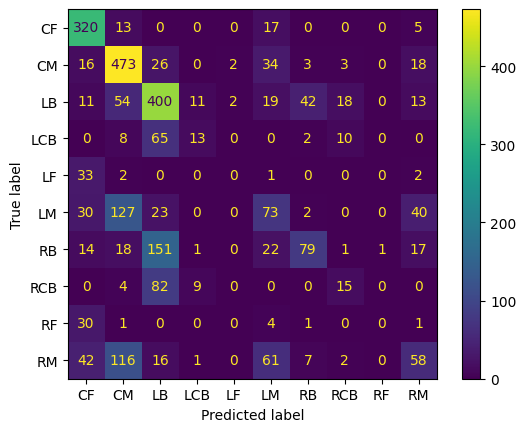

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Print detailed scores
print(classification_report(y_test, y_pred))

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()


In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={
    'LF': 1500,
    'RF': 1500,
    'RCB': 1500,
    'LCB': 1800
}, random_state=42)

X_res, y_res = smote.fit_resample(X_train, y_train)
rf.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [21]:
y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

          CF       0.66      0.86      0.75       355
          CM       0.57      0.82      0.67       575
          LB       0.54      0.60      0.57       570
         LCB       0.25      0.28      0.26        98
          LF       0.00      0.00      0.00        38
          LM       0.28      0.20      0.23       295
          RB       0.52      0.25      0.34       304
         RCB       0.34      0.29      0.32       110
          RF       0.00      0.00      0.00        37
          RM       0.40      0.21      0.28       303

    accuracy                           0.51      2685
   macro avg       0.36      0.35      0.34      2685
weighted avg       0.48      0.51      0.48      2685



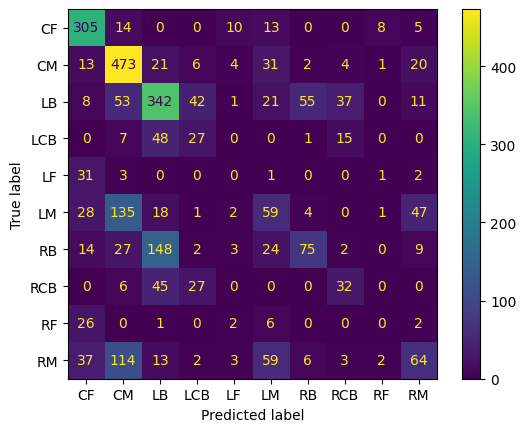

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Print detailed scores
print(classification_report(y_test, y_pred))

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

What’s going wrong:
Even if you oversample small classes, the model might not separate them if:

The features are too similar to other positions (e.g., LF looks like LM or CF).

The features are weak (not enough signal to learn from).

SMOTE can sometimes make the problem worse if the data is noisy ➔ it creates fake examples that confuse the model even more.

Merge very similar rare classes together.

Example:

Merge LF + CF → into a generic F (Forward).

Merge RF + CF → into F too.

Or Merge RCB + LCB → into CB (Center Back).

➔ This will reduce the number of classes from 10 to maybe 6–7 and give us much better performance.

In [23]:
# Create a dictionary for mapping
position_mapping = {
    'CF': 'F',
    'LF': 'F',
    'RF': 'F',
    'LB': 'LB',
    'RB': 'RB',
    'LM': 'LM',
    'RM': 'RM',
    'CM': 'CM',
    'LCB': 'CB',
    'RCB': 'CB'
}

# Apply mapping to your target
y = y.map(position_mapping)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df, y, stratify=y, test_size=0.2, random_state=42)

In [26]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_leaf=5,
    class_weight='balanced_subsample',
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       min_samples_leaf=5, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [27]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          CB       0.48      0.70      0.56       220
          CM       0.60      0.76      0.67       549
           F       0.80      0.91      0.85       432
          LB       0.64      0.36      0.46       603
          LM       0.28      0.24      0.26       291
          RB       0.44      0.56      0.49       295
          RM       0.31      0.22      0.26       295

    accuracy                           0.55      2685
   macro avg       0.51      0.54      0.51      2685
weighted avg       0.55      0.55      0.53      2685



In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=7,  # 7 classes now
    n_estimators=500,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

from sklearn.preprocessing import LabelEncoder

# Create label encoder
le = LabelEncoder()

# Fit on y_train and transform both train/test
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
xgb.fit(X_train, y_train_enc)
y_pred_enc = xgb.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred_enc)

print(classification_report(y_test, y_pred_labels))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:41:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

          CB       0.54      0.45      0.49       220
          CM       0.61      0.80      0.69       549
           F       0.83      0.91      0.87       432
          LB       0.57      0.62      0.59       603
          LM       0.27      0.19      0.22       291
          RB       0.46      0.34      0.39       295
          RM       0.33      0.24      0.28       295

    accuracy                           0.57      2685
   macro avg       0.51      0.51      0.51      2685
weighted avg       0.55      0.57      0.55      2685



In [32]:
y.value_counts()

Position
LB    3014
CM    2747
F     2163
RM    1476
RB    1473
LM    1453
CB    1099
Name: count, dtype: int64

In [35]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

# Check the encoding mapping to update the sampling strategy
class_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Class mapping:", class_mapping)

# Apply SMOTE with the numeric class labels (you can replace 'RM', 'RB', etc. with their numeric equivalents)
smote = SMOTE(sampling_strategy={class_mapping['RM']: 1600,
                                class_mapping['RB']: 1600,
                                class_mapping['LM']: 1600,
                                class_mapping['CB']: 1600},
              random_state=42)

# Apply SMOTE on the encoded labels
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_enc)

# Fit XGBoost model with the resampled data
xgb.fit(X_train_resampled, y_train_resampled)

Class mapping: {'CB': 0, 'CM': 1, 'F': 2, 'LB': 3, 'LM': 4, 'RB': 5, 'RM': 6}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:45:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_class=7, num_parallel_tree=None, ...)

In [36]:
y_pred_enc = xgb.predict(X_test)

# Step 5: Convert numeric predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred_enc)

# Step 6: Evaluate the model using classification report
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

          CB       0.51      0.48      0.50       220
          CM       0.62      0.79      0.70       549
           F       0.84      0.90      0.87       432
          LB       0.58      0.58      0.58       603
          LM       0.25      0.18      0.21       291
          RB       0.47      0.42      0.44       295
          RM       0.30      0.24      0.27       295

    accuracy                           0.57      2685
   macro avg       0.51      0.51      0.51      2685
weighted avg       0.55      0.57      0.55      2685



In [48]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encode labels (if not already)
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Fit SVM (linear kernel for speed)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = svm.predict(X_test)

# Report
print(classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

          CB       0.46      0.67      0.54       220
          CM       0.61      0.80      0.69       549
           F       0.83      0.91      0.87       432
          LB       0.62      0.38      0.47       603
          LM       0.26      0.21      0.23       291
          RB       0.44      0.55      0.49       295
          RM       0.31      0.20      0.24       295

    accuracy                           0.56      2685
   macro avg       0.50      0.53      0.51      2685
weighted avg       0.55      0.56      0.54      2685



In [49]:
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encode label
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Fit LightGBM
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = lgbm.predict(X_test)

# Report
print(classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10414
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 43
[LightGBM] [Info] Start training from score -2.074743
[LightGBM] [Info] Start training from score -1.757199
[LightGBM] [Info] Start training from score -1.996047
[LightGBM] [Info] Start training from score -1.664705
[LightGBM] [Info] Start training from score -2.074743
[LightGBM] [Info] Start training from score -2.074743
[LightGBM] [Info] Start training from score -2.074743
              precision    recall  f1-score   support

          CB       0.51      0.51      0.51       220
          CM       0.59      0.75      0.66       549
           F       0.85      0.89      0.87       432
          LB       0.57      0.56  

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Fit Extra Trees
et = ExtraTreesClassifier(random_state=42)
et.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = et.predict(X_test)

# Report
print(classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

          CB       0.47      0.58      0.52       220
          CM       0.57      0.79      0.66       549
           F       0.79      0.92      0.85       432
          LB       0.55      0.50      0.53       603
          LM       0.31      0.21      0.25       291
          RB       0.45      0.32      0.37       295
          RM       0.34      0.23      0.27       295

    accuracy                           0.55      2685
   macro avg       0.50      0.51      0.49      2685
weighted avg       0.53      0.55      0.53      2685



In [51]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('lgbm', lgb.LGBMClassifier(random_state=42)),
        ('et', ExtraTreesClassifier(random_state=42))
    ],
    voting='soft'
)

ensemble.fit(X_train_resampled, y_train_resampled)
y_pred = ensemble.predict(X_test)

print(classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10414
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 43
[LightGBM] [Info] Start training from score -2.074743
[LightGBM] [Info] Start training from score -1.757199
[LightGBM] [Info] Start training from score -1.996047
[LightGBM] [Info] Start training from score -1.664705
[LightGBM] [Info] Start training from score -2.074743
[LightGBM] [Info] Start training from score -2.074743
[LightGBM] [Info] Start training from score -2.074743
              precision    recall  f1-score   support

          CB       0.47      0.53      0.50       220
          CM       0.59      0.78      0.67       549
           F       0.82      0.91      0.86       432
          LB       0.57      0.53  

In [52]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)

y_pred = mlp.predict(X_test)

print(classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

          CB       0.44      0.47      0.45       220
          CM       0.59      0.61      0.60       549
           F       0.83      0.77      0.80       432
          LB       0.50      0.50      0.50       603
          LM       0.19      0.20      0.20       291
          RB       0.38      0.33      0.35       295
          RM       0.23      0.25      0.24       295

    accuracy                           0.48      2685
   macro avg       0.45      0.45      0.45      2685
weighted avg       0.49      0.48      0.49      2685



In [69]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the training and test sets
print(X_train.shape, y_train.shape)


(10740, 43) (10740,)


In [70]:
from imblearn.over_sampling import SMOTE

# Use SMOTE to resample the training data to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shapes after resampling
print(f"Resampled X_train shape: {X_train_resampled.shape}")
print(f"Resampled y_train shape: {y_train_resampled.shape}")


Resampled X_train shape: (16877, 43)
Resampled y_train shape: (16877,)


In [71]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to encode labels into numeric form
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train_resampled)
y_test_enc = label_encoder.transform(y_test)

# Check the shapes of the encoded labels
print(f"y_train_enc shape: {y_train_enc.shape}")
print(f"y_test_enc shape: {y_test_enc.shape}")


y_train_enc shape: (16877,)
y_test_enc shape: (2685,)


In [72]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree=2, interaction_only=True)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit and transform the resampled training data
X_train_poly = poly.fit_transform(X_train_resampled)

# Transform the test data using the same polynomial features
X_test_poly = poly.transform(X_test)

# Check the shape of the transformed feature matrices
print(f"X_train_poly shape: {X_train_poly.shape}")
print(f"X_test_poly shape: {X_test_poly.shape}")


X_train_poly shape: (16877, 946)
X_test_poly shape: (2685, 946)


In [73]:
from sklearn.preprocessing import StandardScaler

# Apply scaling (mean=0, variance=1) to the polynomial features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test_poly)  # Transform on test data using the same scaler

# Check the shape of the scaled features
print(f"Transformed X_train_scaled shape: {X_train_scaled.shape}")
print(f"Transformed X_test_scaled shape: {X_test_scaled.shape}")


Transformed X_train_scaled shape: (16877, 946)
Transformed X_test_scaled shape: (2685, 946)


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train_enc)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model using classification report
print(classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

          CB       0.45      0.61      0.52       220
          CM       0.59      0.70      0.64       549
           F       0.82      0.88      0.85       432
          LB       0.59      0.40      0.48       603
          LM       0.23      0.20      0.21       291
          RB       0.42      0.48      0.45       295
          RM       0.27      0.24      0.25       295

    accuracy                           0.53      2685
   macro avg       0.48      0.50      0.48      2685
weighted avg       0.52      0.53      0.52      2685

